## Veri Seti Hikayesi ve Yapısının İncelenmesi

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
df =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Temperleme_Denemeler/AK0001C.xlsx', sheet_name="Sayfa2")
#df =pd.read_excel('Temperleme_Denemeler/AK0001C.xlsx', sheet_name="Sayfa2")
df.head()

,S,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,AB1,AB2,AB3,ÜB1,ÜB2,ÜB3,Şoklama Hava Sıcaklığı,Kırılma
0,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,28,1
1,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,28,1
2,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,27,1
3,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,27,1
4,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,26,1


In [7]:
#@title
df.describe()

,S,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,AB1,AB2,AB3,ÜB1,ÜB2,ÜB3,Şoklama Hava Sıcaklığı,Kırılma
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,553.131991,567.505593,586.465324,605.771812,622.639821,639.463087,646.355705,652.774049,653.275168,652.033557,652.087248,32.100671,31.498881,36.588367,7.165548,7.114094,8.429530,33.315436,0.818792
std,12.129275,9.703420,6.212820,4.211005,4.412836,2.256600,4.925554,4.593371,4.557838,3.279402,3.430148,3.681389,4.218194,6.835062,2.238949,2.764761,9.304217,4.279088,0.385622
min,550.000000,565.000000,570.000000,580.000000,620.000000,630.000000,630.000000,635.000000,632.000000,633.000000,630.000000,28.000000,27.000000,28.000000,6.000000,6.000000,6.000000,24.000000,0.000000
25%,550.000000,565.000000,585.000000,605.000000,620.000000,640.000000,645.000000,650.000000,655.000000,653.000000,653.000000,28.000000,28.500000,35.000000,6.000000,6.000000,6.000000,30.000000,1.000000
50%,550.000000,565.000000,585.000000,605.000000,620.000000,640.000000,645.000000,655.000000,655.000000,653.000000,653.000000,30.000000,30.000000,36.000000,6.000000,6.000000,6.000000,32.000000,1.000000
75%,550.000000,565.000000,585.000000,605.000000,630.000000,640.000000,652.000000,655.000000,655.000000,653.000000,653.000000,36.000000,33.000000,36.000000,8.000000,7.000000,7.000000,37.000000,1.000000
max,600.000000,605.000000,610.000000,620.000000,630.000000,640.000000,652.000000,660.000000,660.000000,662.000000,662.000000,44.000000,45.000000,70.000000,43.000000,43.000000,68.000000,44.000000,1.000000


## Eksik Değerlerin İncelenmesi

## Isıtma, soğutma ve kırılma değikenleri zaman grafiği

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

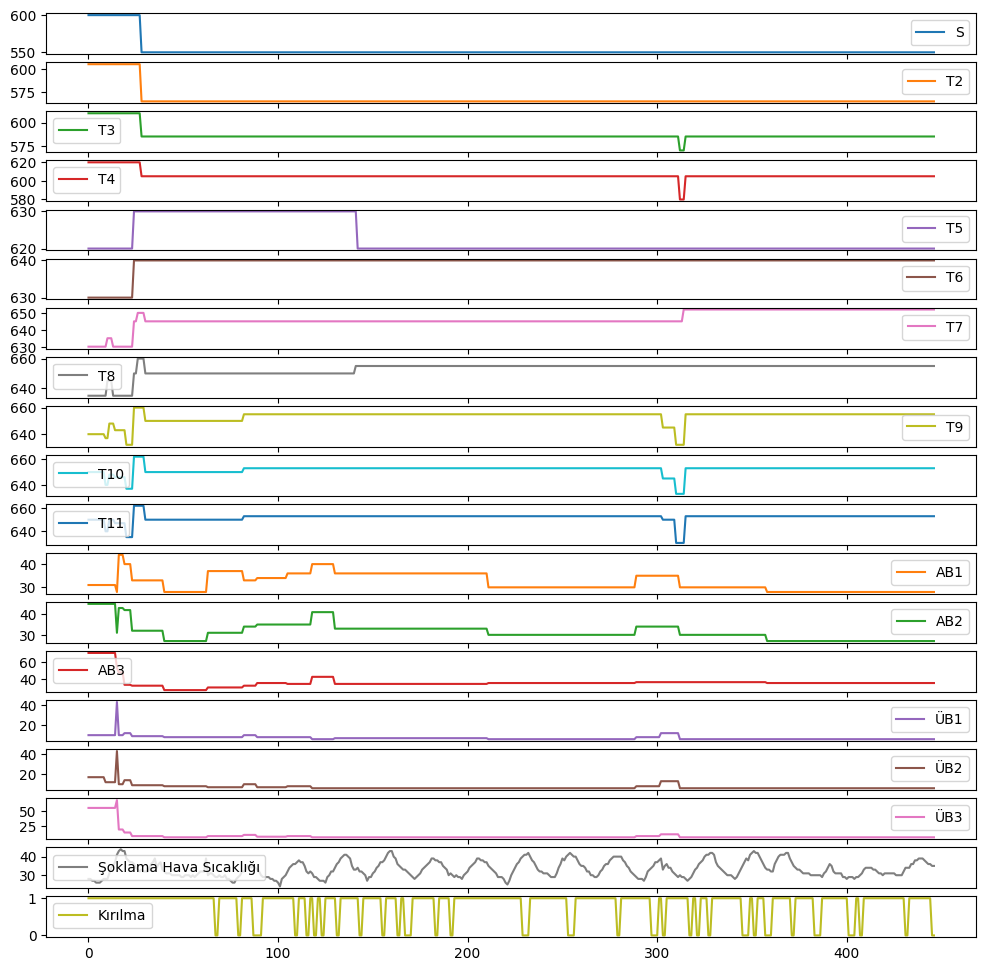

In [8]:
#@title
df.plot(figsize=(12, 12), subplots=True)

## Kırılmanın "Şoklama Hava Sıcaklığı" na göre dağılımı

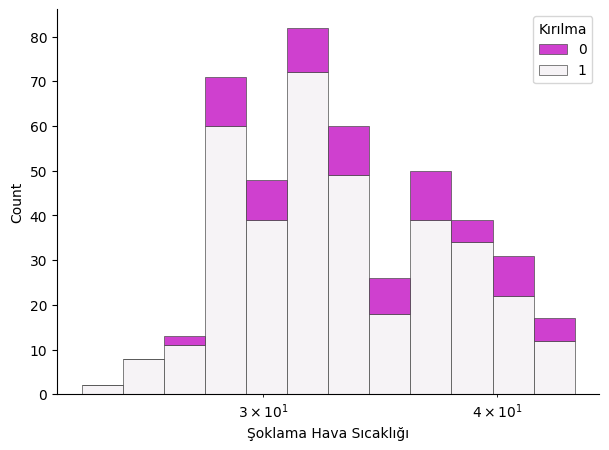

In [ ]:
#@title
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
df=df
sns.histplot(
    df,
    x="Şoklama Hava Sıcaklığı", hue="Kırılma",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_xticks([15,20,25,30,35,40])

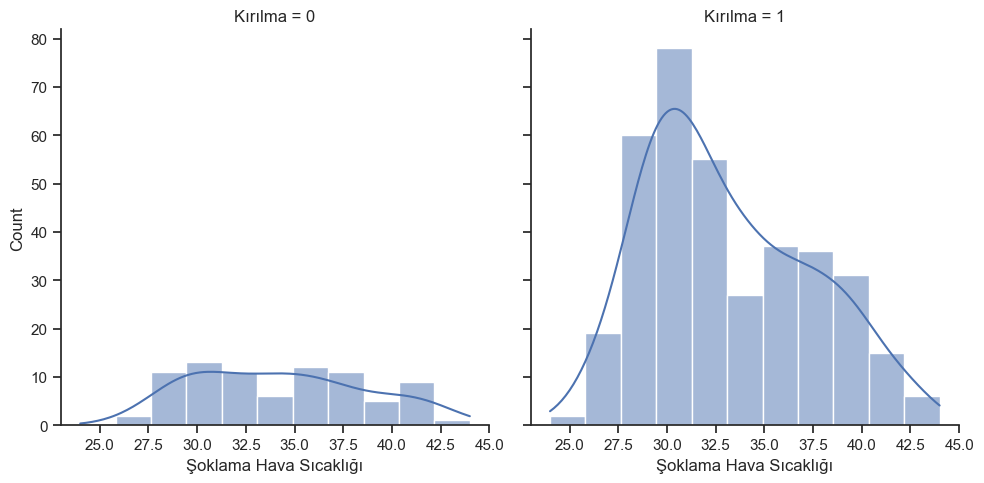

In [ ]:
#@title
sns.displot(data=df, x="Şoklama Hava Sıcaklığı", col="Kırılma", kde=True)


## Kırılma'nın soğutma hava basınçlarına göre değişimleri


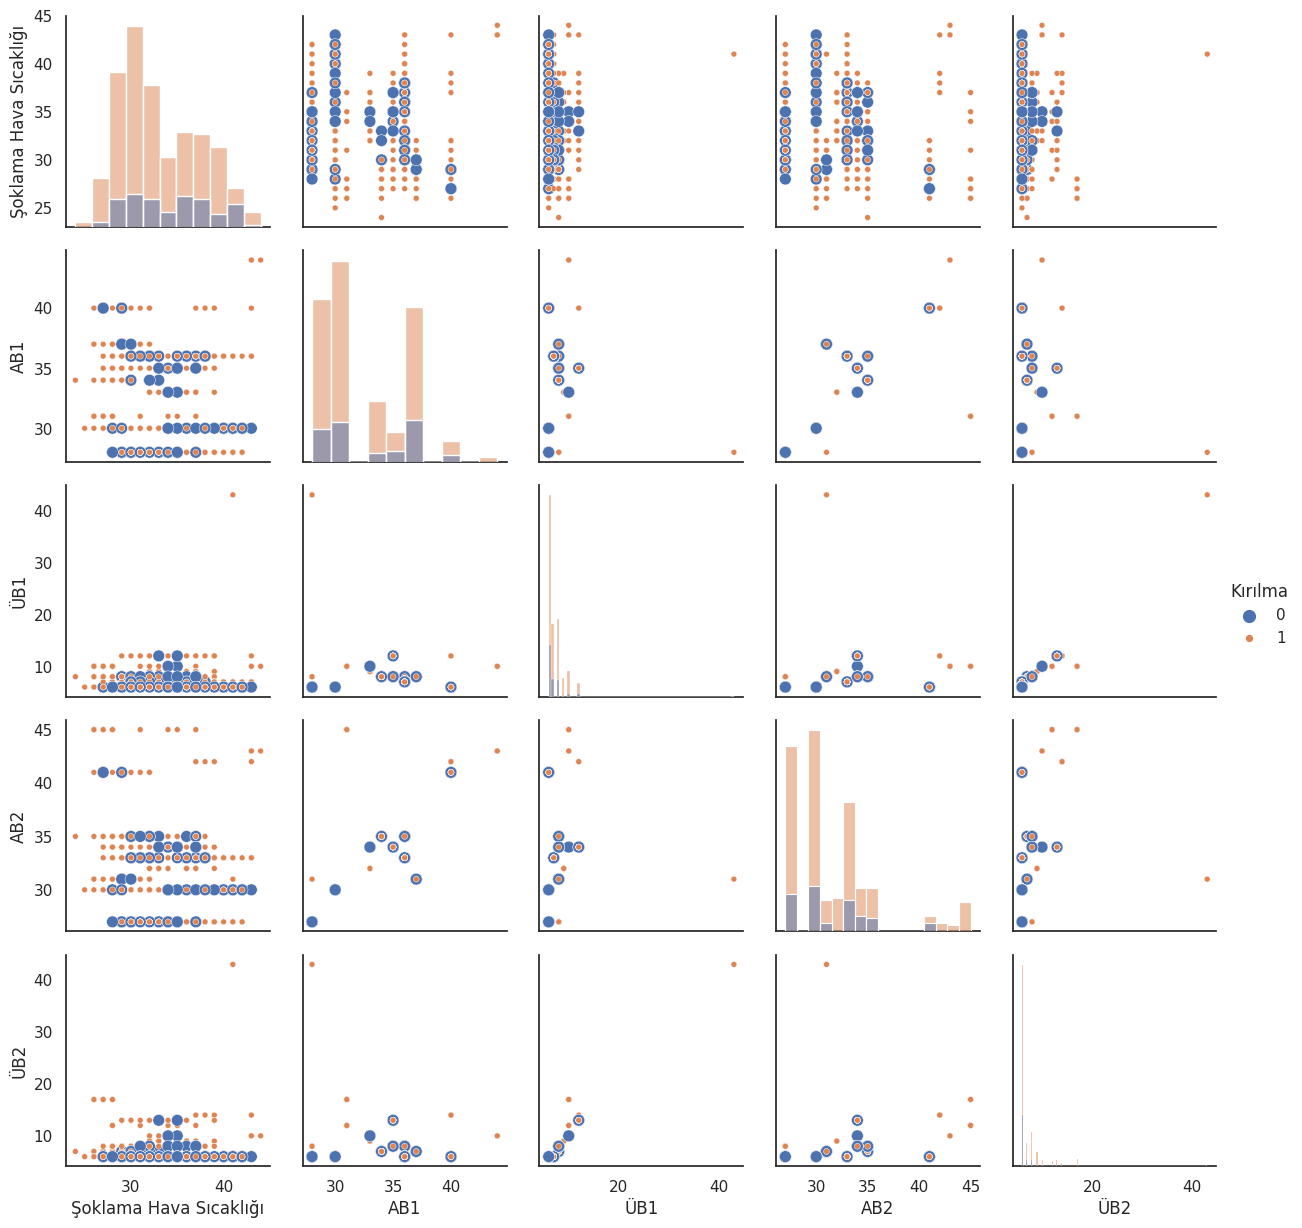

In [16]:
#@title
sns.set_theme(style="white")

g = sns.PairGrid(df, hue="Kırılma", vars=("Şoklama Hava Sıcaklığı","AB1","ÜB1","AB2","ÜB2"), diag_sharey=False)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=df[("Kırılma")])
g.add_legend()

## Kırılma'nın Şoklama Hava Sıcaklığı'na bağlı zamanla değişimi dağılımı

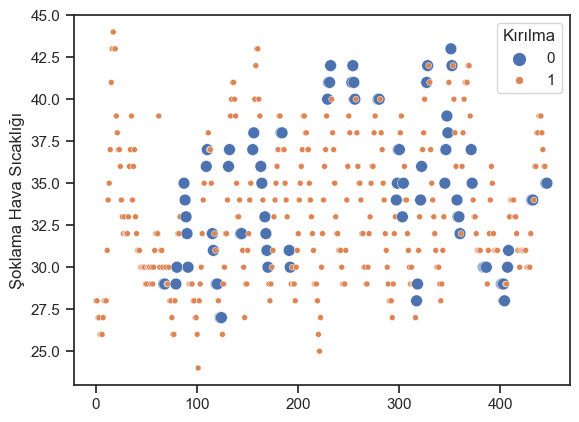

In [ ]:
#@title
sns.scatterplot(y = "Şoklama Hava Sıcaklığı", x = df.index, hue="Kırılma",size="Kırılma",data = df);

## Kırılma'nın Altbasınç ve Üstbasınca göre değişimi

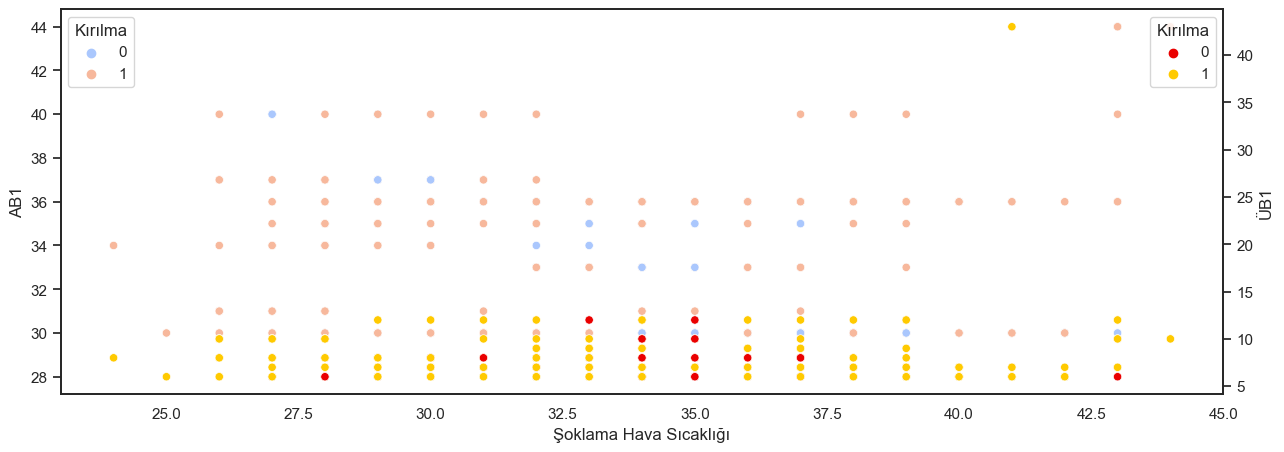

In [ ]:
#@title

fig, ax = plt.subplots()
fig.set_size_inches(15,5);
sns.scatterplot(y = "AB1", x = "Şoklama Hava Sıcaklığı", hue = "Kırılma",data = df,palette = "coolwarm", ax = ax);
ax2 = ax.twinx()
sns.scatterplot(y = "ÜB1", x = "Şoklama Hava Sıcaklığı", hue = "Kırılma", ax=ax2, data=df,palette = "hot");


## Kırolmanın Alt ve Üst basınca göre zamana bağlı değişimi

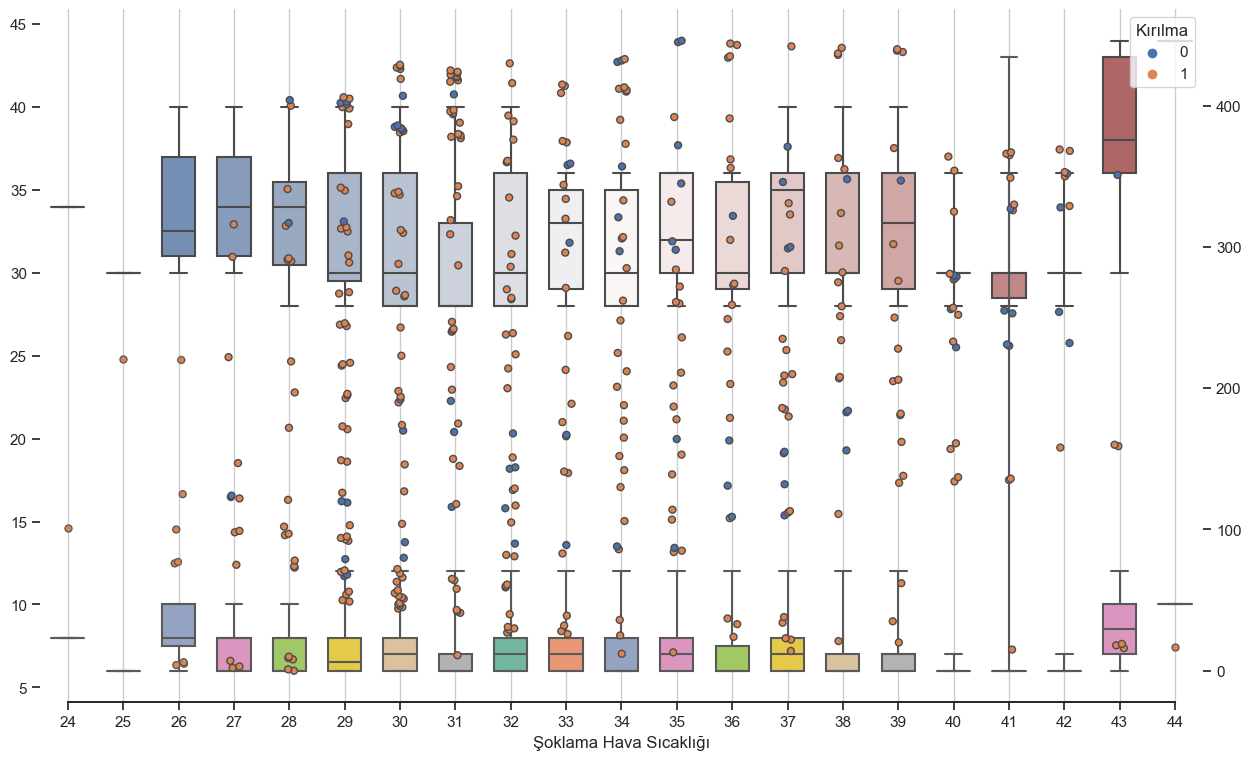

In [ ]:
#@title
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))
ax.set_xscale("linear")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Şoklama Hava Sıcaklığı", y="AB1", data=df,
            whis=[0, 100], width=.6, palette="vlag",ax=ax)
sns.boxplot(x="Şoklama Hava Sıcaklığı", y="ÜB1", data=df,
            whis=[0, 100], width=.6, palette="Set2", ax=ax)
ax2 = ax.twinx()
# Add in points to show each observation
sns.stripplot(x="Şoklama Hava Sıcaklığı", y=df.index,hue="Kırılma", data=df,
              size=5, linewidth=1,ax=ax2)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## Doğrusal İlişkinin Gösterilmesi

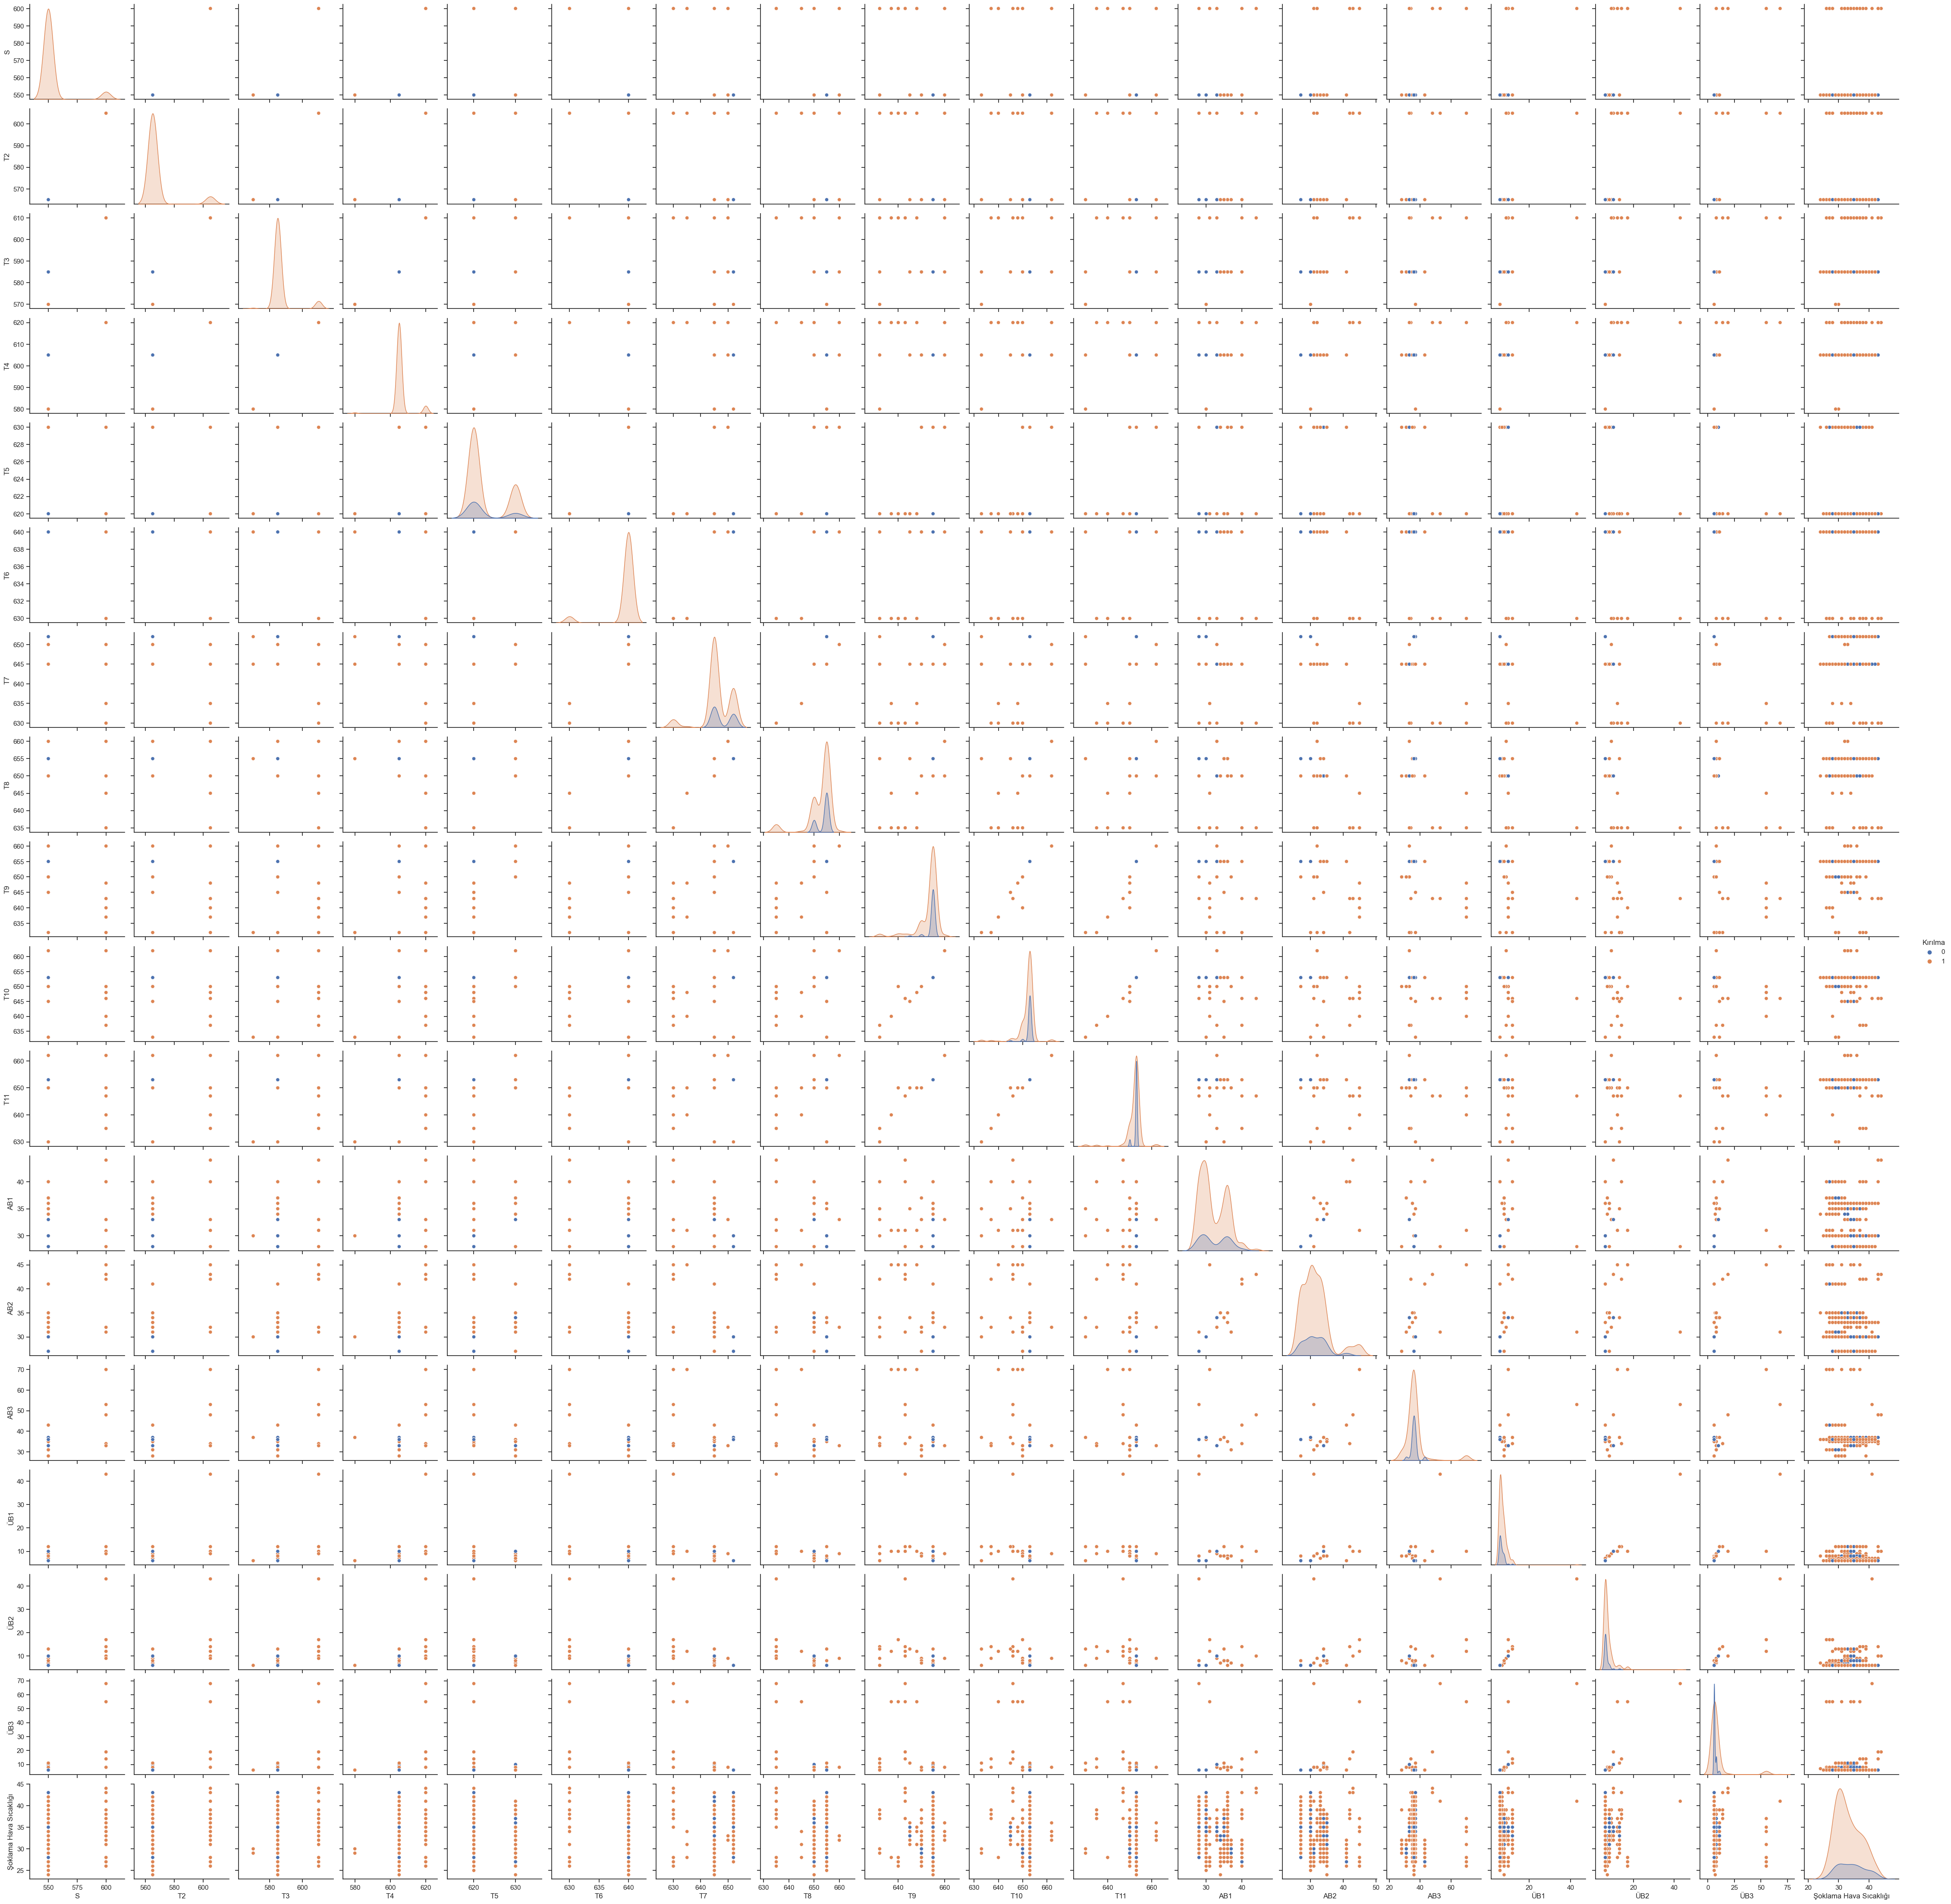

In [ ]:
sns.pairplot(df, hue = "Kırılma");

## Verinin korelosyon dağılımı

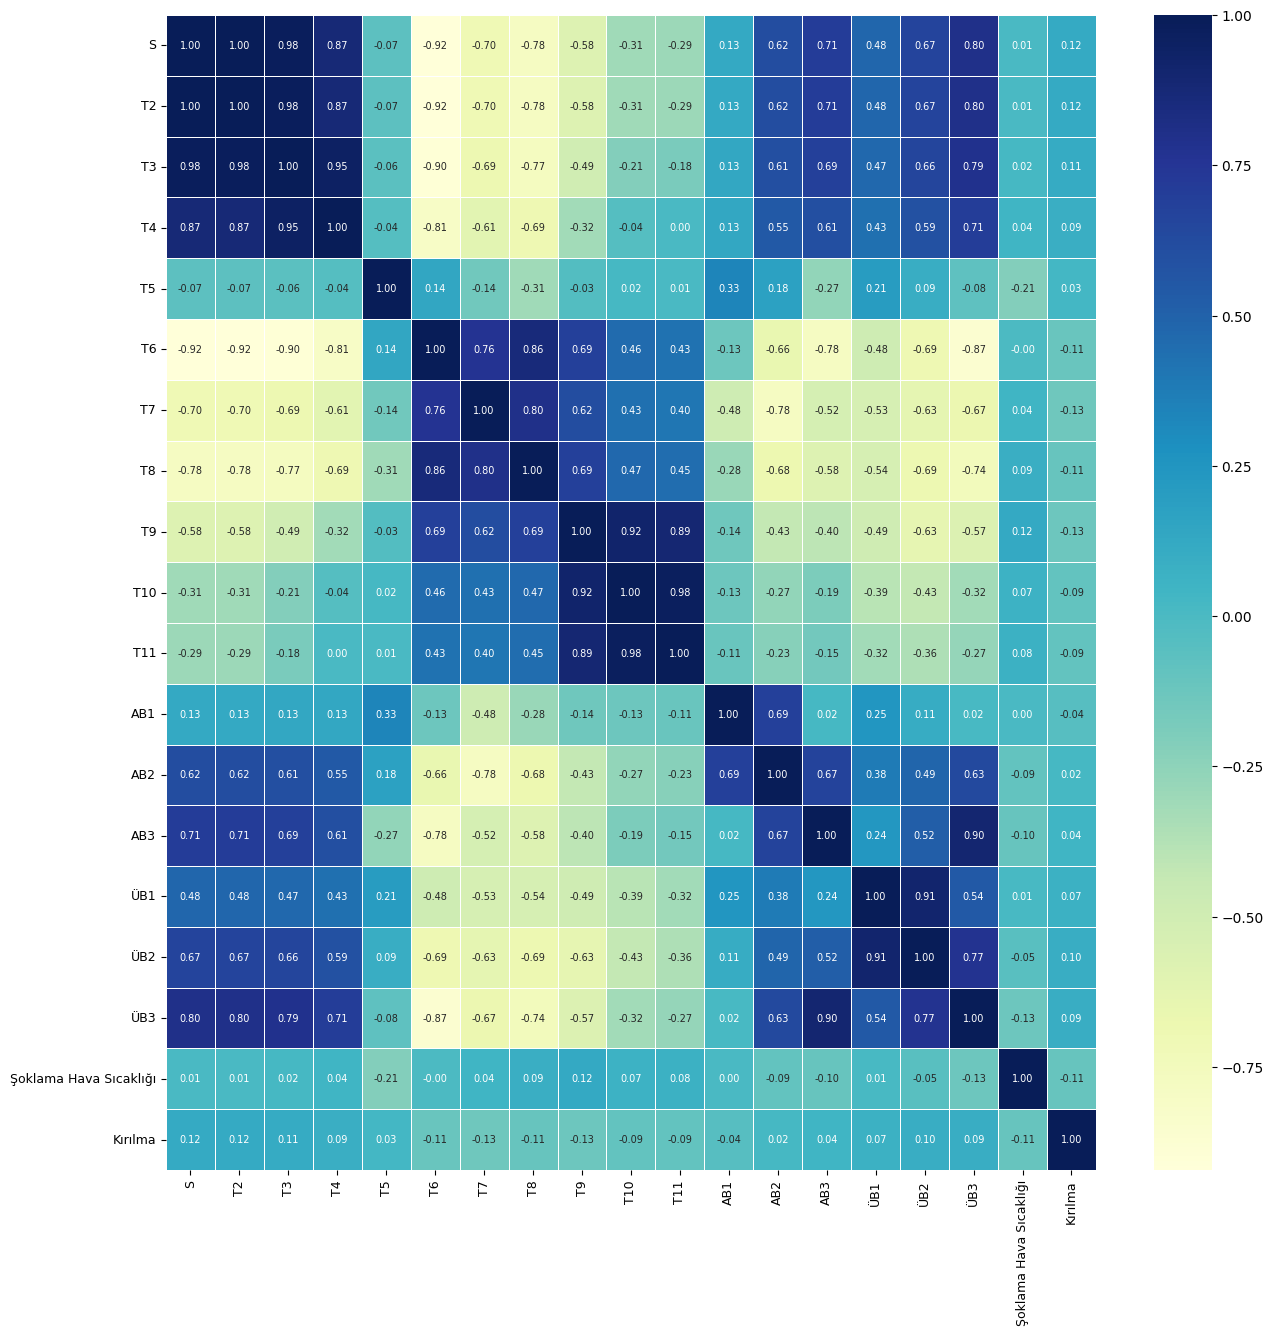

In [ ]:
#@title
# Let's make our correlation matrix for df
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15), )
#ax.set_xlabel('X Label', fontsize=9)  # set x-axis label font size
#ax.set_ylabel('Y Label', fontsize=9)  # set y-axis label font size
ax.tick_params(axis='x', labelsize=9) # set x-axis tick label font size
ax.tick_params(axis='y', labelsize=9) # set x-axis tick label font size
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".2f",
                 cmap="YlGnBu", annot_kws={"size": 7});
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0, top - 0)
ax.tick_params(axis='y', labelsize=9) # set x-axis tick label font size